# DAX Stock Index
 - U = [1000,8000].

In [1]:
import numpy as np
import pandas as pd
from FTS import fts_util
from PyEMD import EMD
import seaborn as sns
import matplotlib.pyplot as plt
cores = sns.color_palette(n_colors=21)

In [2]:
ts = pd.read_csv('../../data/csv/stock/GDAXI.csv', index_col=[0])
ts.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-11-01,1421.229980,1496.050049,1359.180054,1441.199951,1441.199951,0
1990-12-01,1466.400024,1527.359985,1389.349976,1389.349976,1389.349976,0
1991-01-01,1359.430054,1421.160034,1317.170044,1421.160034,1421.160034,0
1991-02-01,1417.520020,1606.060059,1417.520020,1564.449951,1564.449951,0
1991-03-01,1521.300049,1604.670044,1499.260010,1515.319946,1515.319946,0


In [3]:
col = 'Close'

In [4]:
Ul = 1000
Uu = 8000

In [6]:
D1 = min(ts[col].values) - Ul
D2 = Uu - max(ts[col].values)


print('MIn:{} Max:{}'.format(min(ts[col].values),max(ts[col].values)))
print('D1:{} and D2:{}'.format(D1,D2))
print('U = [{},{}]'.format(Ul,Uu))

MIn:1389.349976 Max:7644.549805
D1:389.34997599999997 and D2:355.45019500000035
U = [1000,8000]


### Chen 1996

Chen 1996 model
MAPE......: 12.32
------------------------------
MAE.......: 369.39
------------------------------
MSE.......: 191204.19
------------------------------
RMSE......: 437.27
------------------------------
DTW.......: 135.0477702679558


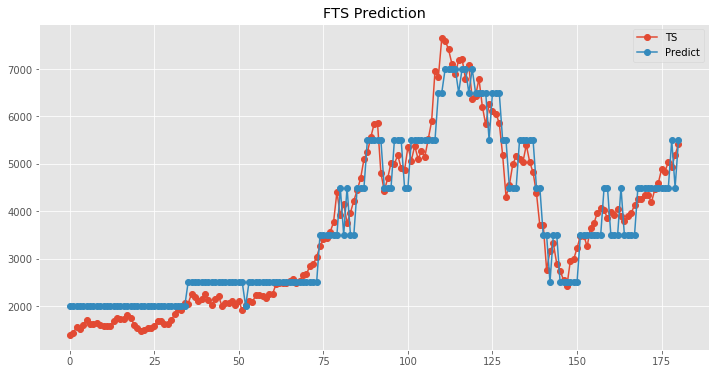

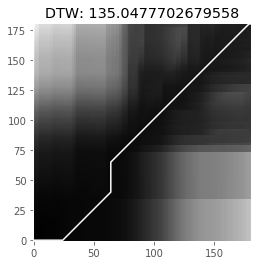


SUMMARY
------------------------------
Partition:181 size:182
Fazendo Treinamento em 181 e teste em 0 dos dados



In [8]:
from FTS.Models.Chen import Chen1996

model = Chen1996()
model.fit(ts[col].values, sets=7, d1=D1, d2=D2)
model.predict()
model.summary()

### Lee 2009

MAPE......: 10.07
------------------------------
MAE.......: 325.3
------------------------------
MSE.......: 166947.87
------------------------------
RMSE......: 408.59
------------------------------
DTW.......: 125.303040086416


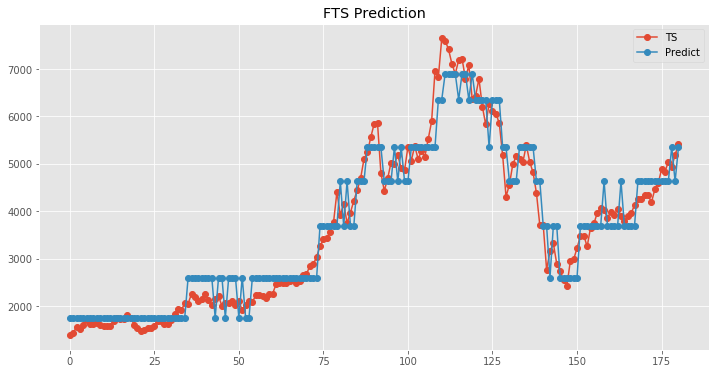

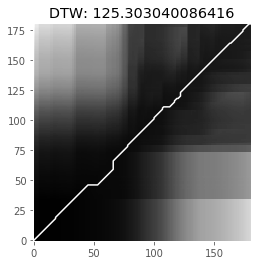

(10.07, 325.3, 166947.87, 408.59)

In [10]:
from FTS.Models.Lee import Lee2009
model = Lee2009()
model.fit(ts[col].values, sets=7 ,d1=D2, d2=D2)
model.predict()

### Wang 2013 + Chen 1996

MAPE......: 10.87
------------------------------
MAE.......: 368.58
------------------------------
MSE.......: 219219.08
------------------------------
RMSE......: 468.21
------------------------------
DTW.......: 136.0160571892265


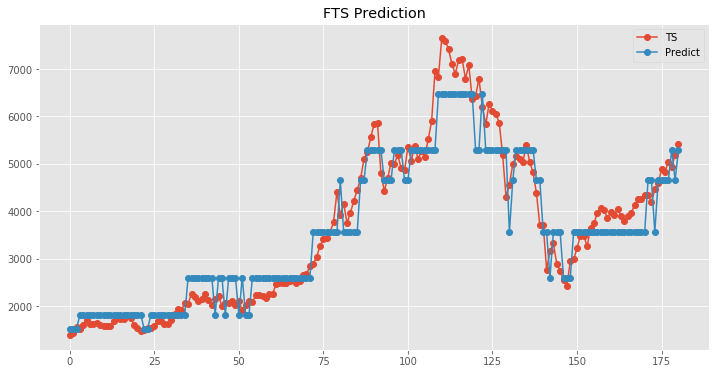

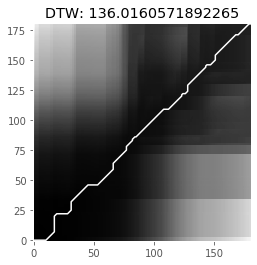

(10.87, 368.58, 219219.08, 468.21)

In [12]:
from FTS.Models.Wang_Chen import Wang2013_Chen
model = Wang2013_Chen()
model.fit(ts[col].values, sets=7, d1=D1, d2=D2)
model.predict()

MAPE......: 11.31
------------------------------
MAE.......: 360.23
------------------------------
MSE.......: 198019.56
------------------------------
RMSE......: 444.99
------------------------------
DTW.......: 130.3381660565106


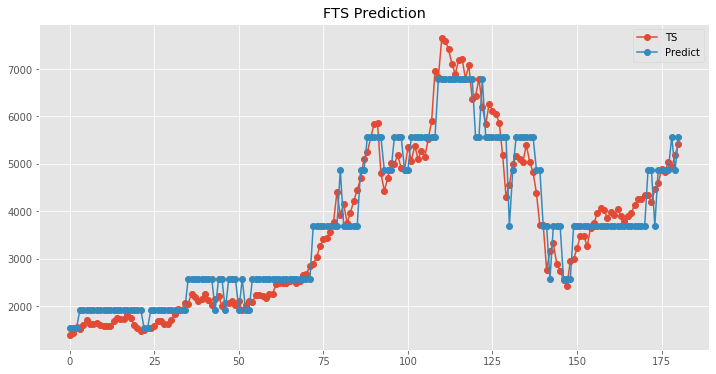

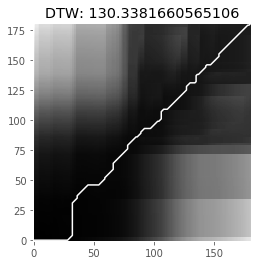

(11.31, 360.23, 198019.56, 444.99)

In [13]:
from FTS.Models.Wang_Lee import Wang2013_Lee
model = Wang2013_Lee()
model.fit(ts[col].values, sets=7, d1=D1, d2=D2)
model.predict()

### Proposed Method + Chen 1996

In [14]:
# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(ts[col].values)

df_fts = pd.DataFrame(ts[col].copy())
df_fts[col] = ts

col_imf = '2+3+residue'
df_fts[col_imf] = imfs[2]+imfs[3]+imfs[4]

/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


MAPE......: 11.61
------------------------------
MAE.......: 333.44
------------------------------
MSE.......: 177745.19
------------------------------
RMSE......: 421.6
------------------------------
DTW.......: 130.922905732231


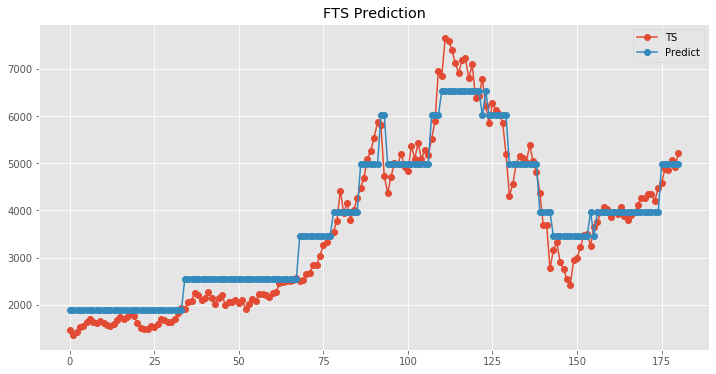

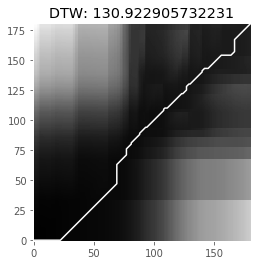

(11.61, 333.44, 177745.19, 421.6)

In [15]:
from FTS.Models.MV_Chen import STFMV_Convencional
model = STFMV_Convencional()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()

### Proposed Method + Lee 2009

/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/home/marcos/envts/lib/python3.6/site-packages/fcmeans/fcm.py:51: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


MAPE......: 6.76
------------------------------
MAE.......: 233.28
------------------------------
MSE.......: 107032.86
------------------------------
RMSE......: 327.16
------------------------------
DTW.......: 100.22345394945712


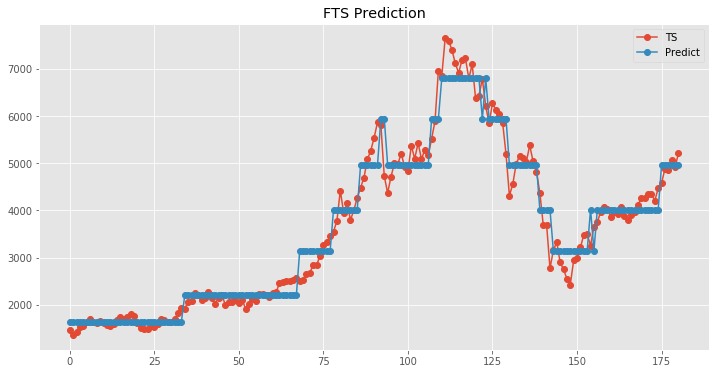

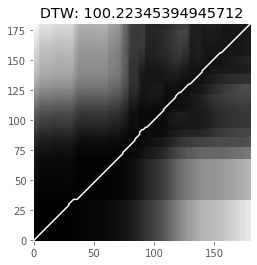

(6.76, 233.28, 107032.86, 327.16)

In [16]:
from FTS.Models.MV_Lee import STFMV_Convencional as my_fts_lee
model = my_fts_lee()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()